In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
summary_statistics = market_data_df.describe()

# Display summary statistics
display(summary_statistics)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [6]:
# Load the data into a Pandas DataFrame
file_path = 'Resources/crypto_market_data.csv'  
market_data_df = pd.read_csv(file_path, index_col='coin_id')

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data (excluding the index)
scaled_data = scaler.fit_transform(market_data_df)

# Convert the scaled data back into a DataFrame, maintaining the index
scaled_market_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Display the first 10 rows of the scaled DataFrame
display(scaled_market_data_df.head(10))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
import matplotlib.pyplot as plt

# Create a list with the number of k-values to try
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_market_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

# # Plot the Elbow curve
# plt.figure(figsize=(8, 6))
# plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal k')
# plt.show()

    k     inertia
0   1  287.000000
1   2  212.123342
2   3  170.193571
3   4   79.022435
4   5   71.097914
5   6   66.108827
6   7   54.488123
7   8   43.224693
8   9   32.860884
9  10   28.404885


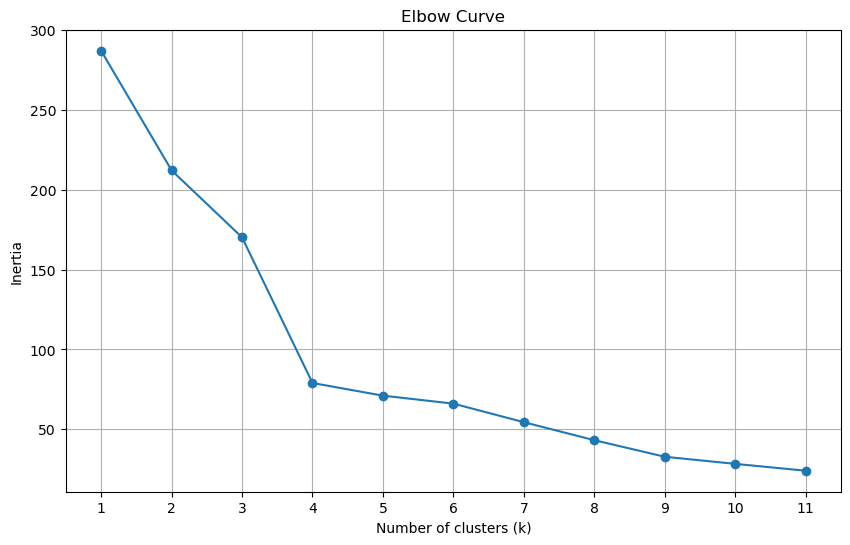

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** THE BEST K VALUE HERE WILL BE 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the data into a Pandas DataFrame
file_path = '/mnt/data/crypto_market_data.csv'
market_data_df = pd.read_csv(file_path, index_col='coin_id')

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data (excluding the index)
scaled_data = scaler.fit_transform(market_data_df)

# Convert the scaled data back into a DataFrame, maintaining the index
scaled_market_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Initialize the K-Means model using the best value for k (assuming k=4 from the Elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the K-Means model using the scaled data
kmeans.fit(scaled_market_data_df)

# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_market_data_df)

# View the resulting array of cluster values
print(clusters)

# Create a copy of the DataFrame
market_data_with_clusters = scaled_market_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_with_clusters['Cluster'] = clusters

# Display sample data
print(market_data_with_clusters.head(10))

In [10]:
# Initialize the K-Means model using the best value for k

kmeans_best = KMeans(n_clusters=4, random_state=42)


In [9]:
# Fit the K-Means model using the scaled data
# Fit the model to the data using the scaled DataFrame

# Assuming the best k-value is determined visually (for example, let's assume it's 4)
best_k = 4

# Initialize the KMeans model using the best value for k
kmeans_best = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the data using the scaled DataFrame
kmeans_best.fit(normalized_df)

# Print the cluster centers
print("Cluster Centers:")
print(kmeans_best.cluster_centers_)

# Optionally, add the cluster labels to the original DataFrame
market_data_df['cluster'] = kmeans_best.labels_

# Display the DataFrame with cluster labels
print(market_data_df.head())


kmeans_best.fit(normalized_df)


Cluster Centers:
[[ 0.23756041  1.19101578  0.83462785  0.19065425 -0.212313   -0.22264199
  -0.20800783]
 [ 1.04553034 -0.61832816  2.90705393  5.35145461  4.76991278  3.14887546
   1.34848839]
 [ 0.03258562 -0.56998841 -0.4827023  -0.25453208 -0.07913767 -0.18795807
  -0.18203893]
 [-4.98104189 -0.04517829 -1.20695612 -1.21212587  0.04773554  4.63238025
   6.08862545]]
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          1.083880                    7.602780   
ethereum                         0.223920                   10.381340   
tether                          -0.211730                    0.049350   
ripple                          -0.378190                   -0.609260   
bitcoin-cash                     2.905850                   17.097170   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                 

KMeans(n_clusters=4, random_state=42)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data

clusters = kmeans_best.predict(normalized_df)

# View the resulting array of cluster values
print("Cluster Values:")
print(clusters)

# Optionally, add the cluster labels to the original DataFrame
market_data_df['cluster'] = clusters

# Display the DataFrame with cluster labels
print(market_data_df.head())



Cluster Values:
[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          1.083880                    7.602780   
ethereum                         0.223920                   10.381340   
tether                          -0.211730                    0.049350   
ripple                          -0.378190                   -0.609260   
bitcoin-cash                     2.905850                   17.097170   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          6.575090                     7.672580   
ethereum                         4.808490                     0.131690   
tether                           0.006400                    -0.042370   
ripple           

In [11]:
# Create a copy of the DataFrame

market_data_copy = market_data_df.copy()



In [12]:
# Add a new column to the DataFrame with the predicted clusters

# # Add the cluster labels to the copied DataFrame
# market_data_copy['cluster'] = clusters

# # Display the copied DataFrame with cluster labels
# #print(market_data_copy.head())
# market_data_copy.describe

# # Display the DataFrame with cluster labels
# #display(market_data_df)

# display(market_data_copy.head(10))


####### CHECK AND CLEAN THE CODE IN THIS BOX######################

# Predict the clusters using the scaled data
clusters = kmeans_best.predict(normalized_df)

# Add the cluster labels to the original DataFrame
market_data_df['cluster'] = clusters

# Display the DataFrame with cluster labels
print(market_data_df)

# Optionally, display the first few rows in a formatted table
display(market_data_df.head())

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  1.083880                    7.602780   
ethereum                                 0.223920                   10.381340   
tether                                  -0.211730                    0.049350   
ripple                                  -0.378190                   -0.609260   
bitcoin-cash                             2.905850                   17.097170   
binancecoin                              2.104230                   12.855110   
chainlink                               -0.239350                   20.694590   
cardano                                  0.003220                   13.993020   
litecoin                                -0.063410                    6.602210   
bitcoin-cash-sv                          0.925300                    3.296410   
crypto-com-chain            

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.083880,7.602780,6.575090,7.672580,-3.251850,83.518400,37.517610,0
ethereum,0.223920,10.381340,4.808490,0.131690,-12.888900,186.774180,101.960230,0
tether,-0.211730,0.049350,0.006400,-0.042370,0.280370,-0.005420,0.019540,2
ripple,-0.378190,-0.609260,2.249840,0.234550,-17.552450,39.538880,-16.601930,2
bitcoin-cash,2.905850,17.097170,14.753340,15.749030,-13.717930,21.660420,14.493840,0


#### MY RESULTS ARE NOT THE SAME AS THE EXPECTED RESULTS ABOVE

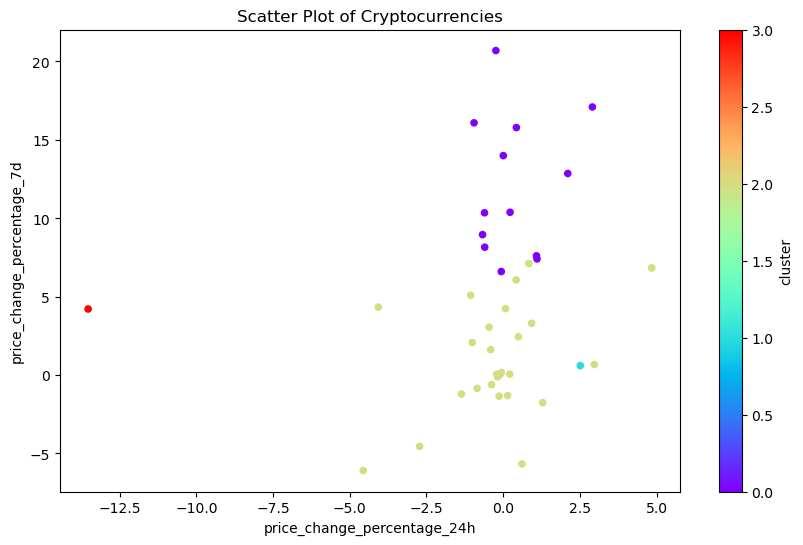

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

scatter_plot = market_data_df.plot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="cluster", 
    colormap="rainbow",
    figsize=(10, 6),
    title="Scatter Plot of Cryptocurrencies"
)

# Display the scatter plot
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)

# Fit the PCA model to the scaled data
pca_data = pca.fit_transform(normalized_df)

# Convert the PCA transformed data to a DataFrame
pca_df = pd.DataFrame(pca_data, index=market_data_df.index, columns=['PC1', 'PC2', 'PC3'])

# Add the cluster labels to the PCA DataFrame
pca_df['cluster'] = clusters

# Display the PCA DataFrame with cluster labels
print(pca_df.head())

                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.


# View the first five rows of the DataFrame. 


#Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data and transform the data
pca_data = pca.fit_transform(normalized_df)

# Display the first five rows of the PCA transformed data
print(pca_data[:5])
# Display the first five rows of the PCA transformed data
print("PCA Transformed Data (first 5 rows):")
print(f"array({pca_data[:5]})")

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]
PCA Transformed Data (first 5 rows):
array([[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]])


###### ABOVE HERE WE ARE MISSING THE WORD "ARRAY" IN THE FINAL OUTPUT

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display the explained variance ratio
print("Explained Variance Ratio of each Principal Component:")
print(f"array({explained_variance})")


Explained Variance Ratio of each Principal Component:
array([0.3719856  0.34700813 0.17603793])


#### Answer the following question: ############## ANSWER THE QUESTION HERE *************

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data

# Create a DataFrame with the PCA data
pca_columns = ['PC1', 'PC2', 'PC3']
pca_df = pd.DataFrame(pca_data, columns=pca_columns, index=market_data_df.index)

# Copy the cluster labels from the original data
pca_df['cluster'] = market_data_df['cluster']

# Display sample data
display(pca_df.head())


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


###### ABOVE, REMOVE THE COLUMN CLUSTER AS IT IS NOT THE EXPECTED OUT PUT

### Find the Best Value for k Using the PCA Data

# My values are a littel higher than the expated here below of the K- inertia value***********

In [19]:

# Create a list with the number of k-values to try
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


     k    inertia
0    1 294.386281
1    2 205.235240
2    3 136.405371
3    4  49.665497
4    5  39.398990
5    6  33.016450
6    7  30.744032
7    8  20.689414
8    9  16.519177
9   10  14.417461
10  11  10.252456


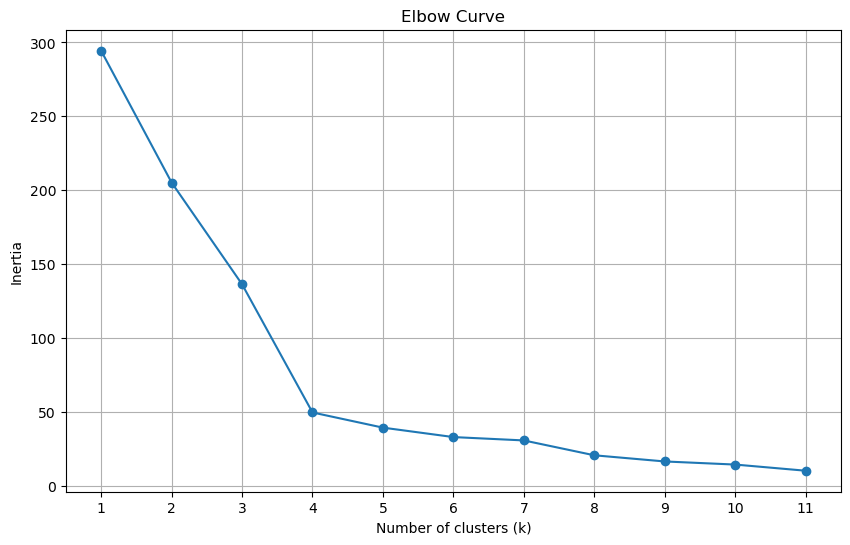

In [20]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following questions: ***************** ANSWER THESE QUESTIONS
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [21]:
# Initialize the K-Means model using the best value for k
# Assuming the best k-value is determined visually (for example, let's assume it's 4)
best_k = 4

# Initialize the KMeans model using the best value for k
kmeans_best = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the data using the PCA DataFrame
kmeans_best.fit(pca_df)

# Predict the clusters using the PCA DataFrame
pca_df['cluster'] = kmeans_best.predict(pca_df)

# Display the DataFrame with cluster labels
print(pca_df.head())

                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        1
ripple       -0.471835 -0.222660 -0.479053        1
bitcoin-cash -1.157800  2.041209  1.859715        0


In [22]:
# Fit the K-Means model using the PCA data
# Fit the model to the data using the PCA DataFrame
kmeans_best.fit(pca_df)

# Predict the clusters using the PCA DataFrame
pca_df['cluster'] = kmeans_best.predict(pca_df)

# Display the DataFrame with cluster labels
print(pca_df.head())

                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [23]:
# Predict the clusters to group the cryptocurrencies using the PCA data
# Predict the clusters using the PCA DataFrame
clusters = kmeans_best.predict(pca_df)

# Print the resulting array of cluster values
print("Resulting array of cluster values:")
print(clusters)




Resulting array of cluster values:
[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 0 2 2 3
 2 2 2 2]


###### MY ARRAY CLUSTER RESULT HAS DIFFERENT DATA THAN EXPECTED WHICH IS A BUNCH OF 1 AND 0 ****** CHECK EVERYTHING

In [24]:
# Create a copy of the DataFrame with the PCA data
# Add a new column to the DataFrame with the predicted clusters
# Display sample data

# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['cluster'] = clusters

# Display sample data
print(pca_df_copy.head())


                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [26]:
pip install hvplot

Note: you may need to restart the kernel to use updated packages.


#########CLEAN THE BOX BELOW AND REMOVE THE EXTRA CODING

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715
     k    inertia
0    1 256.874086
1    2 182.339530
2    3 140.431833
3    4  49.665497
4    5  42.051901
5    6  31.749005
6    7  28.031869
7    8  19.451747
8    9  13.814082
9   10  10.630648
10  11  10.120243


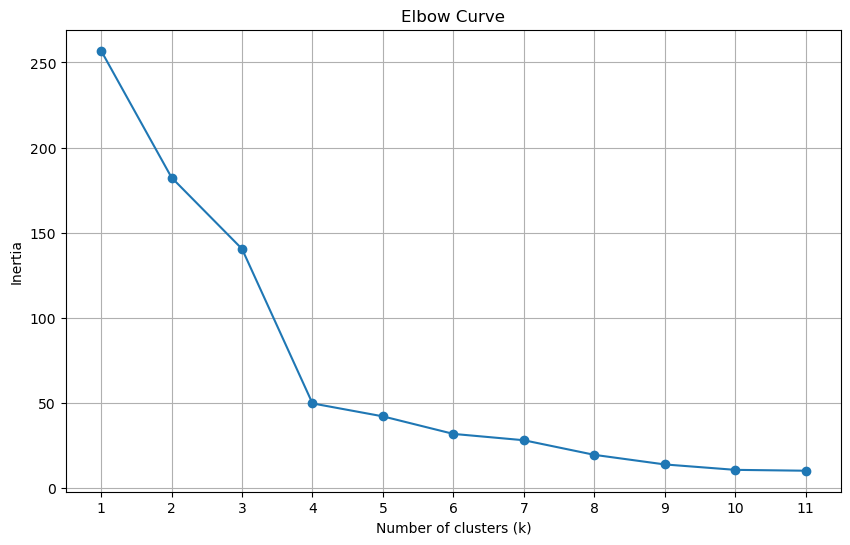

                  PCA1      PCA2      PCA3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


:Scatter   [PCA1]   (PCA2,cluster)

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import hvplot.pandas


# Create a DataFrame with the PCA data
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_df = pd.DataFrame(pca_data, columns=pca_columns, index=market_data_df.index)

# Display sample data
print(pca_df.head())

# Create a list with the number of k-values to try
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Assuming the best k-value is determined visually (for example, let's assume it's 4)
best_k = 4

# Initialize the KMeans model using the best value for k
kmeans_best = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the data using the PCA DataFrame
kmeans_best.fit(pca_df)

# Predict the clusters using the PCA DataFrame
clusters = kmeans_best.predict(pca_df)

# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['cluster'] = clusters

# Display sample data
print(pca_df_copy.head())

# Create a scatter plot using hvPlot by setting x="PCA1" and y="PCA2"
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PCA1', 
    y='PCA2', 
    c='cluster', 
    colormap='Category10', 
    title='Scatter Plot of PCA1 vs PCA2'
)

# Display the scatter plot
scatter_plot

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import hvplot.pandas

# Load the data
file_path = '/mnt/data/crypto_market_data.csv'
market_data_df = pd.read_csv(file_path, index_col="coin_id")

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(market_data_df)

# Convert the scaled data back to a DataFrame with the original indices
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data and transform the data
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA data using the original indices
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_df = pd.DataFrame(pca_data, columns=pca_columns, index=scaled_df.columns)

# Display sample data
print(pca_df.head())

# Create a list with the number of k-values to try
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Assuming the best k-value is determined visually (for example, let's assume it's 4)
best_k = 4

# Initialize the KMeans model using the best value for k
kmeans_best = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the data using the PCA DataFrame
kmeans_best.fit(pca_df)

# Predict the clusters using the PCA DataFrame
clusters = kmeans_best.predict(pca_df)

# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['cluster'] = clusters

# Display sample data
print(pca_df_copy.head())

# Create a scatter plot using hvPlot by setting x="PCA1" and y="PCA2"
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PCA1', 
    y='PCA2', 
    c='cluster', 
    colormap='Category10', 
    title='Scatter Plot of PCA1 vs PCA2'
)

# Display the scatter plot
scatter_plot

#### Answer the following question: ANSWER THE QUESTION HERE BELOW AND CLEAN THE CODE ABOVE

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    